In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
cd '/content/drive/My Drive/CSCE_689/'

/content/drive/My Drive/CSCE_689


In [0]:
# Load input files from  
import numpy as np
import pandas as pd
labels=pd.read_csv('Labels_final.csv',header=None)
features=pd.read_csv('Features_final.csv',header=None)

In [4]:
features.shape

(6153, 5)

In [11]:
labels[labels[0]==81]

,0,1,2
5559,81,0.0,0
5560,81,0.5,0
5561,81,1.0,0
5562,81,2.0,0
5563,81,2.5,0
5564,81,3.0,0
5565,81,3.5,0
5566,81,4.0,1
5567,81,4.5,1
5568,81,6.0,1


In [0]:

df_features=pd.DataFrame.from_records(features)
df_features["Y"]=labels.loc[:,2]

In [13]:

df_features['label']=labels.iloc[:,0]
df_features.head()

,0,1,2,3,4,Y,label
0,0.216,0.460,0.383,2.13,1.20,0,0
1,0.134,0.401,0.236,2.99,1.22,0,0
2,0.132,0.431,0.267,3.27,1.24,0,0
3,0.230,0.680,0.406,2.95,1.14,0,0
4,0.195,0.303,0.381,1.56,1.23,0,0


In [0]:
feature_mean=df_features[df_features['Y']==0].groupby('label').mean()
feature_std=df_features[df_features['Y']==0].groupby('label').std()

In [0]:
## Normalize the dataframe with mean and standard deviation and add to the input feature
df_normalised=df_features.apply(lambda x: (x[0:5]-feature_mean.loc[x['label']])/feature_std.loc[x['label']],axis=1)
# df_normalised.head()

In [16]:
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)
# df=df_features
df.head()

,0_x,1_x,2_x,3_x,4_x,Y_x,0_y,1_y,2_y,3_y,4_y,Y_y,label
0,0.958314,-0.626852,0.773877,-0.614034,0.330169,NaN,0.216,0.460,0.383,2.13,1.20,0,0
1,-0.213892,-1.087716,-1.241803,-0.455127,0.752786,NaN,0.134,0.401,0.236,2.99,1.22,0,0
2,-0.242482,-0.853378,-0.816727,-0.403389,1.175402,NaN,0.132,0.431,0.267,3.27,1.24,0,0
3,1.158446,1.091621,1.089256,-0.462518,-0.937680,NaN,0.230,0.680,0.406,2.95,1.14,0,0
4,0.658115,-1.853218,0.746453,-0.719356,0.964094,NaN,0.195,0.303,0.381,1.56,1.23,0,0


In [0]:
df['label']=labels.loc[:,2]
df['timestamp']=labels.iloc[:,1]
df['video_label']=labels.iloc[:,0]
df=df.drop(['Y_y', 'Y_x'],axis=1) # 8 inputs
df=df[:-1]

In [0]:
## Train-validation split
train_percentage = 20/24
train_index = 5559
test_index = int(df.shape[0])-5559

In [19]:
df.to_numpy().reshape(int(df.shape[0]/2),2,13)
# df[:-1].shape

array([[[ 9.58313763e-01, -6.26852382e-01,  7.73877099e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-2.13891772e-01, -1.08771581e+00, -1.24180279e+00, ...,
          0.00000000e+00,  5.00000000e-01,  0.00000000e+00]],

       [[-2.42482151e-01, -8.53378476e-01, -8.16727437e-01, ...,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
        [ 1.15844641e+00,  1.09162144e+00,  1.08925558e+00, ...,
          0.00000000e+00,  1.50000000e+00,  0.00000000e+00]],

       [[ 6.58114784e-01, -1.85321779e+00,  7.46452883e-01, ...,
          0.00000000e+00,  3.00000000e+00,  0.00000000e+00],
        [ 4.43686942e-01,  1.35720375e+00,  4.31074397e-01, ...,
          0.00000000e+00,  3.50000000e+00,  0.00000000e+00]],

       ...,

       [[ 4.24990265e-01, -1.35132428e-01,  7.40444012e-01, ...,
          0.00000000e+00,  1.50000000e+01,  1.00000000e+02],
        [ 3.24102368e-01,  8.75750925e-02, -2.98577519e-01, ...,
          0.00000000e+00,  1.55000

In [0]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [0]:
x_test = df_test.drop(["label","timestamp","video_label"],axis=1)
y_test = df_test["label"]
test_timestamp=df_test["timestamp"]
test_video_label=df_test["video_label"]

In [22]:
x_train = df_train.drop(['label',"timestamp","video_label"],axis=1)
y_train = df_train['label']
train_timestamp=df_train["timestamp"]
train_video_label=df_train["video_label"]
np.where(np.asanyarray(np.isnan(x_train)))


(array([], dtype=int64), array([], dtype=int64))

In [23]:
x_train.shape

(5559, 10)

In [24]:

x_test.shape

(593, 10)

In [0]:

import numpy as np
shape=1
x_shaped_train  = np.array(x_train).reshape(int(x_train.shape[0]/shape),10)
x_shaped_test  = np.array(x_test).reshape(int(x_test.shape[0]/shape),10)

In [26]:
x_shaped_train.shape

(5559, 10)

In [27]:
y_train = np.array(y_train).astype('float')
y_test = np.array(y_test).astype('float')
# y_test=y_test[:-1]
y_shaped_train  = []
for i in range(0, len(y_train), shape):
  y_shaped_train.append(y_train[i])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), shape):
  y_shaped_test.append(y_test[i])
print(len(y_shaped_test))

5559
593


In [28]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(5559,)

In [29]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(593,)

In [30]:
x_shaped_test.shape

(593, 10)

In [0]:
np.save("x_train.npy",x_shaped_train)
np.save("y_train.npy",y_shaped_train)
np.save("x_test.npy",x_shaped_test)
np.save("y_test.npy",y_shaped_test)

In [31]:
!pip install talos

     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 8.7MB 7.8MB/s 
     |████████████████████████████████| 378kB 43.1MB/s 
     |████████████████████████████████| 109.2MB 37kB/s 
     |████████████████████████████████| 839kB 44.2MB/s 
     |████████████████████████████████| 3.2MB 28.7MB/s 
     |████████████████████████████████| 491kB 47.1MB/s 
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 sha256=897cd5fec5025324bfeb45772b6e4586180bf5bc45620acf28ad48a82f5cdabf
  Stored in directory: /root/.cache/pip/wheels/75/33/46/c871b94249bd57d17797d049b3dff8e3a09c315afb67eb14c6
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp36-none-any.whl size=3601 sha256=a8aec2f3cbd6755d8288579d7580d8f932b5bbe9ff42c2889a547f61eac792dc
  Stored in directory: /root/.cache/pip/wheels/9d/d3/8c/9503a22b0a38e8b21c70ad834e4606d209193443e5c709305d
  Created wheel for wrangle: filename=wrangle-0.6.7-cp36-none-any.whl size=49894 s

In [32]:
# %tensorflow_version 1.14.
import numpy as np
# from keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Bidirectional, LSTM,Reshape,RepeatVector

# from tensorflow.keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.python.keras.layers.wrappers import TimeDistributed
# from tensorflow.keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    # MaxPooling2D)
from collections import deque
import sys
from tensorflow.keras.utils import plot_model
import keras
from IPython.display import clear_output
from tensorflow.keras import losses
from tensorflow.keras.callbacks import LearningRateScheduler

import tensorflow.keras.backend as K
# from keras_self_attention import SeqSelfAttention
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy
# import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import talos

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Using TensorFlow backend.


In [0]:
# then we can go ahead and set the parameter space
p = {'first_neuron':[128,256,512],
     'batch_size': [64,128,256],
     'dropout': [0.4,0.5,0.6],
     'kernel_initializer': ['uniform','normal'],
     'learning_rate':[0.0001,0.00001,0.000001],
     'class weight':[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]}

In [0]:
## Define Model
def create_model(x_train, y_train, x_val, y_val, params):
  model = Sequential()
  model.add(Dense(int(params['first_neuron']), activation='sigmoid',kernel_initializer=params['kernel_initializer'],input_shape=(10,)))
  # model.add(Reshape(target_shape=(2,10,)))
  model.add(RepeatVector(10))
  model.add((LSTM(int(params['first_neuron']/2), return_sequences=True,input_shape=(2,10,),dropout=params['dropout'])))
  # model.add(SeqSelfAttention(attention_activation='sigmoid'))

  model.add(Flatten())
  model.add(Dense(int(params['first_neuron']/4), activation='relu',kernel_initializer=params['kernel_initializer'])) #FC2
  model.add(Dropout(params['dropout']))
  model.add(Dense(int(params['first_neuron']/16), activation='tanh',kernel_initializer=params['kernel_initializer']))#FC3
  model.add(Dropout(params['dropout']))
  model.add(Dense(1, activation='sigmoid'))#Output Layer
  optimizer = Adam(lr=params['learning_rate'])
  metrics = ['accuracy']
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
  history=model.fit(x_train, y_train,epochs=250, batch_size=params['batch_size'], validation_data = (x_val,y_val),class_weight={0:1,1:params['class weight']},
             callbacks=[talos.utils.ExperimentLogCallback('best_model', params)],verbose=0)
  return history, model



In [35]:
## Hyperparameter scanning
# import talos
t = talos.Scan(x=x_shaped_train,
               y=y_shaped_train,
               model=create_model,
               params=p,
               experiment_name='best_model',
               round_limit=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


 20%|██        | 2/10 [32:53<2:11:14, 984.37s/it]

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


 30%|███       | 3/10 [49:29<1:55:13, 987.66s/it]

 40%|████      | 4/10 [1:20:49<2:05:33, 1255.63s/it]

 50%|█████     | 5/10 [1:29:46<1:26:40, 1040.01s/it]

100%|██████████| 10/10 [3:05:20<00:00, 1112.01s/it]


In [0]:
# use Scan object as input
analyze_object = talos.Analyze(t)

In [42]:
# access the dataframe with the results
analyze_object.data

,round_epochs,loss,acc,val_loss,val_acc,batch_size,class weight,dropout,first_neuron,kernel_initializer,learning_rate
0,250,0.802176,0.780262,0.575413,0.768585,64,2.0,0.4,256,uniform,0.000001
1,250,1.123591,0.530969,0.678132,0.700240,64,4.0,0.4,256,uniform,0.000010
2,250,1.075141,0.535338,0.687198,0.773981,64,3.5,0.4,256,normal,0.000001
3,250,1.146725,0.219481,0.725442,0.231415,128,4.0,0.6,512,normal,0.000100
4,250,1.218321,0.227191,0.741146,0.231415,256,4.5,0.6,256,uniform,0.000010
5,250,1.234192,0.284246,0.757107,0.303357,128,5.0,0.6,256,normal,0.000100
6,250,0.749950,0.781547,0.524963,0.773381,128,2.0,0.4,128,uniform,0.000100
7,250,0.881500,0.731175,0.578221,0.745803,64,3.0,0.4,512,uniform,0.000100
8,250,0.994563,0.707530,0.669296,0.768585,128,3.0,0.5,512,uniform,0.000001
9,250,0.902086,0.777692,0.612966,0.768585,64,2.5,0.5,128,normal,0.000010


In [43]:
# get the highest result for any metric
analyze_object.high('val_acc')

0.7739807963371277

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


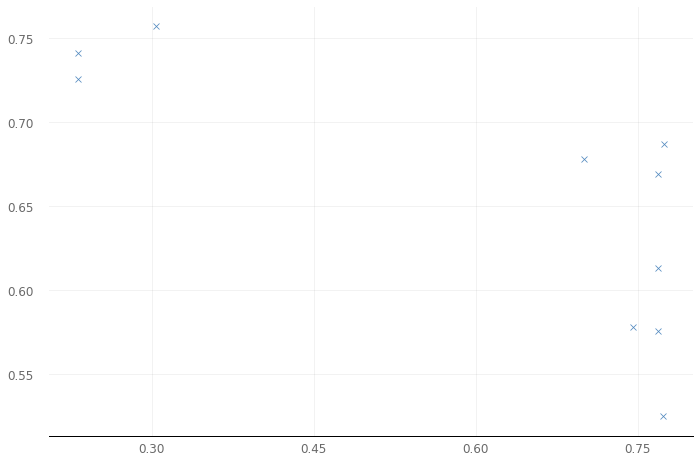

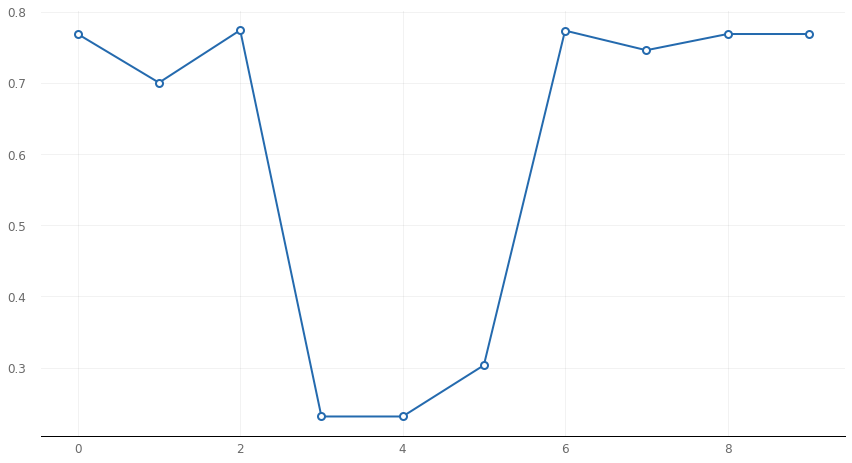

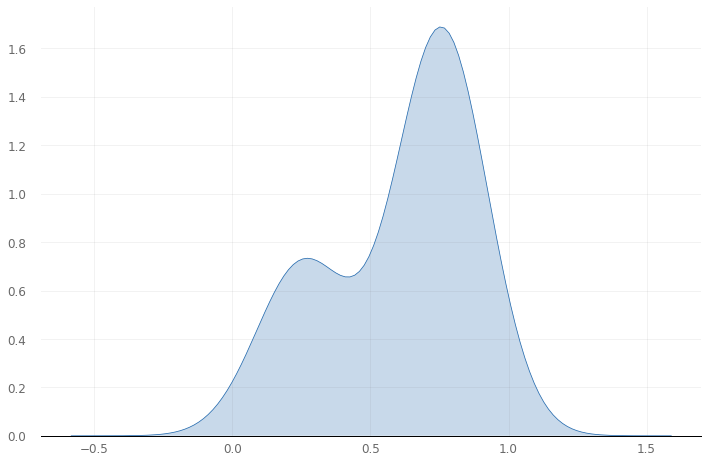

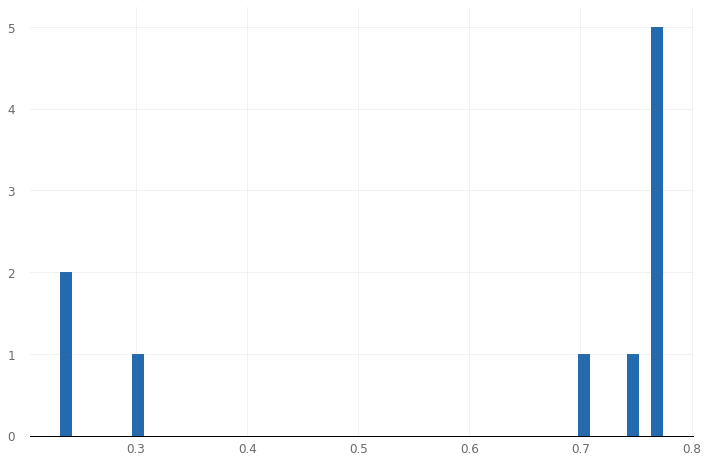

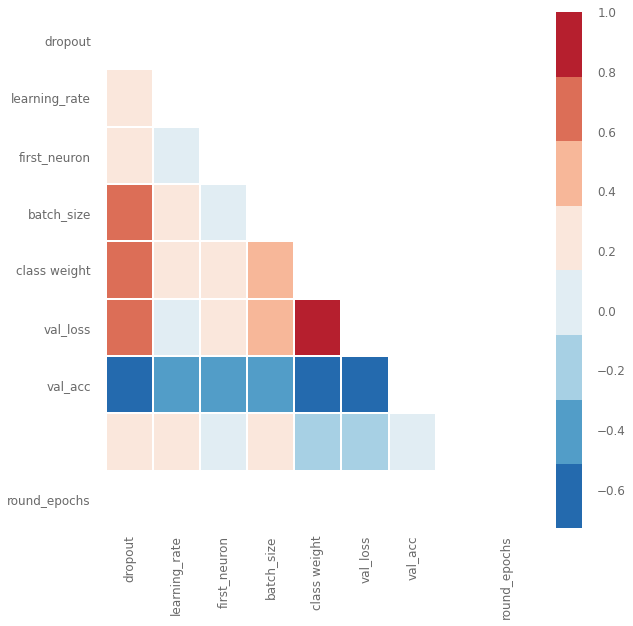

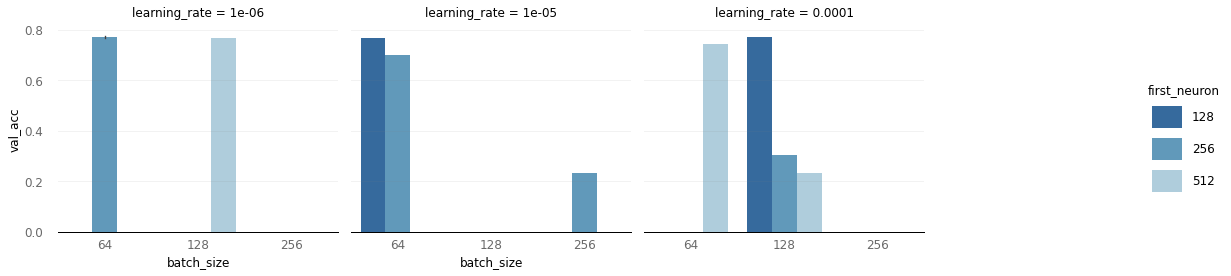

In [44]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

# line plot
analyze_object.plot_line('val_acc')

# up to two dimensional kernel density estimator
analyze_object.plot_kde('val_acc')

# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

# a four dimensional bar grid
analyze_object.plot_bars('batch_size', 'val_acc', 'first_neuron', 'learning_rate')

In [45]:
# get the name of the experiment log (Last .csv file)
!ls -lhtr best_model

total 1.4M
-rw------- 1 root root    0 Mar 31 17:08 033120170841.csv
-rw------- 1 root root 1021 Mar 31 17:24 033120170922.csv
-rw------- 1 root root 196K Mar 31 18:17 033120170922.log
-rw------- 1 root root 1020 Mar 31 19:20 033120183507.csv
-rw------- 1 root root 270K Mar 31 23:54 033120183507.log
-rw------- 1 root root    0 Apr 13 22:39 041320223909.csv
-rw------- 1 root root    0 Apr 13 22:39 041320223918.csv
-rw------- 1 root root 1.1K Apr 13 23:29 041320224635.csv
-rw------- 1 root root 221K Apr 14 02:09 041320224635.log
-rw------- 1 root root 123K Apr 14 03:31 041420030642.log
-rw------- 1 root root 1.1K Apr 14 03:31 041420030642.csv
-rw------- 1 root root 1.1K Apr 14 04:39 041420041730.csv
-rw------- 1 root root 196K Apr 14 05:42 041420041730.log
-rw------- 1 root root 1.1K Apr 16 00:39 041620002629.csv
-rw------- 1 root root 208K Apr 16 03:43 041620002629.log
-rw------- 1 root root    0 Apr 16 05:04 041620050432.csv
-rw------- 1 root root    0 Apr 16 05:04 041620050448.csv
-rw

In [0]:
from talos.utils.recover_best_model import recover_best_model

results, models = recover_best_model(x_train=x_shaped_train,
                                     y_train=y_shaped_train.reshape(-1,1),
                                     x_val=x_shaped_test,
                                     y_val=y_shaped_test.reshape(-1,1),
                                     experiment_log='best_model/041620145940.csv', ## Use the name obtained from above
                                     input_model=create_model,
                                     n_models=5,
                                     task='multi_label')

In [0]:
## Top performing models
results

In [0]:
## Best Model
model=models[0]

In [0]:
params=dict(results.iloc[0,:])
history,model=create_model(x_shaped_train,y_shaped_train,x_shaped_test,y_shaped_test,params)

In [49]:
params

{'acc': 0.7809365,
 'batch_size': 64,
 'class weight': 2.0,
 'crossval_mean_f1score': 1.0,
 'dropout': 0.4,
 'first_neuron': 512,
 'kernel_initializer': 'normal',
 'learning_rate': 0.0001,
 'loss': 0.7198031522757233,
 'round_epochs': 250,
 'val_acc': 0.793238,
 'val_loss': 0.5196221425102343}

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


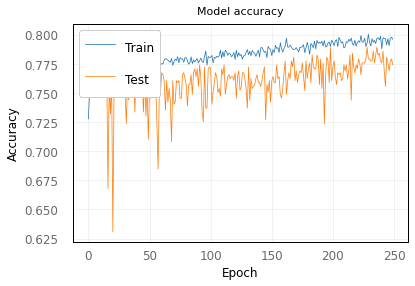

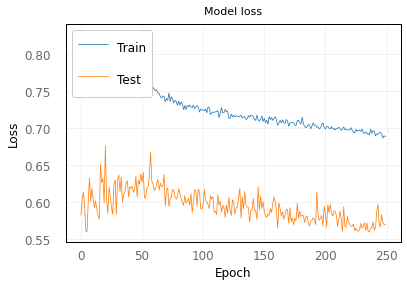

In [50]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [51]:
## Prediction, Accuracy, F1-score, ROC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn),average='micro')
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.7740303541315345, 0.7740303541315345, 0.7086689309396733]
[[409  49]
 [ 85  50]]


In [52]:
len(pred_rnn.astype('int'))

593

In [0]:
## Multiplying predicted labels into 2 to match for each timeframe
# pred=np.array([pred_rnn[i//2] for i in range(len(pred_rnn)*2)]) 
# pred_prob=np.array([y_score_10[i//2] for i in range(len(y_score_10)*2)]) 


In [0]:
## Plotting time-label graph for each of the validation videos
plot_df=pd.DataFrame()
plot_df["label"]=test_video_label
plot_df["time"]=test_timestamp
plot_df["pred"]=pred_rnn #pred

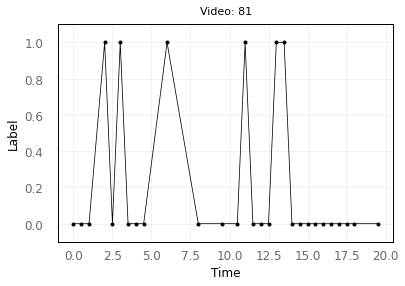

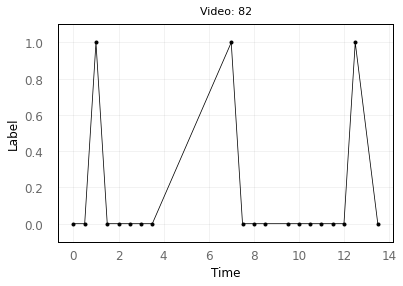

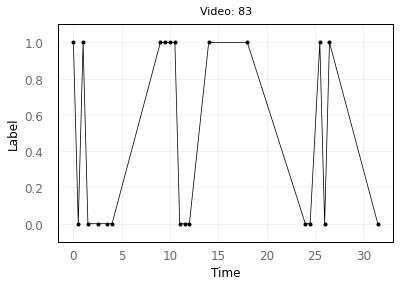

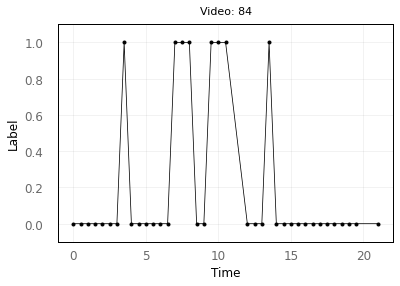

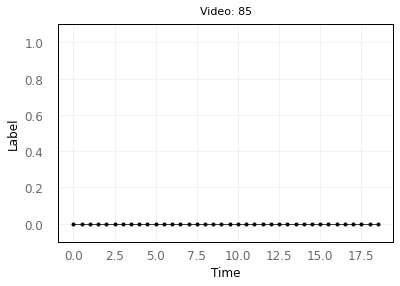

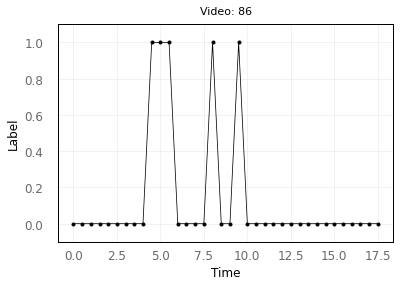

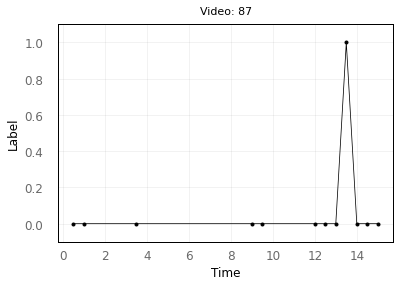

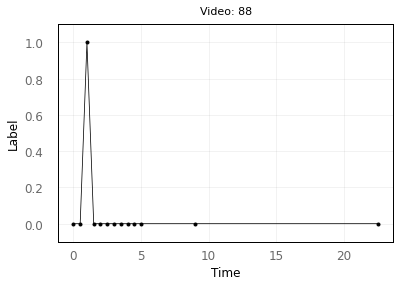

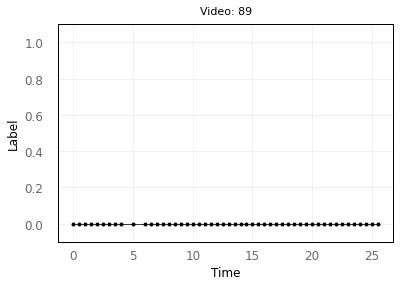

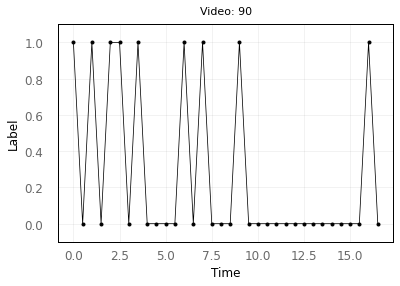

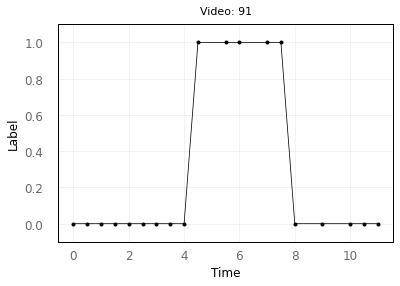

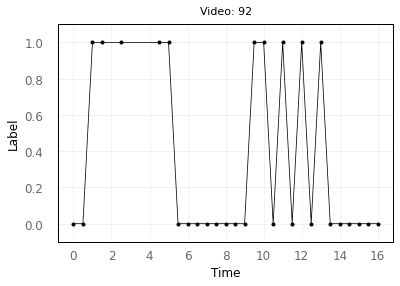

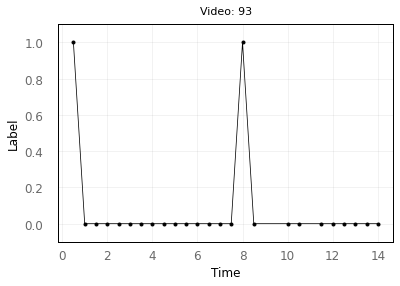

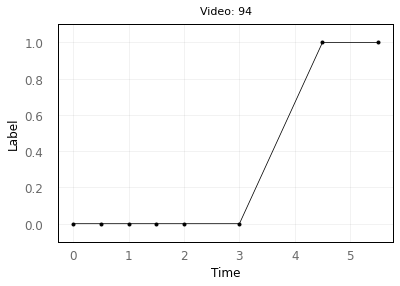

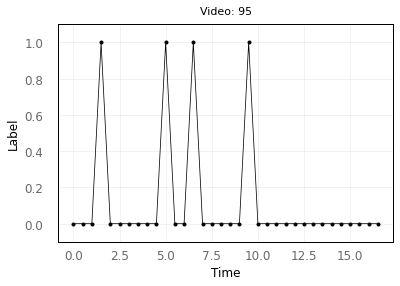

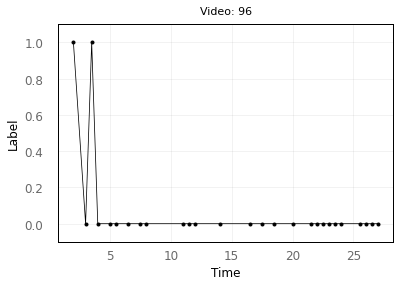

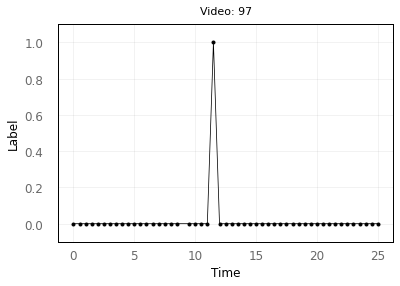

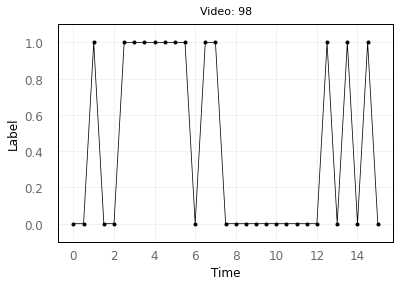

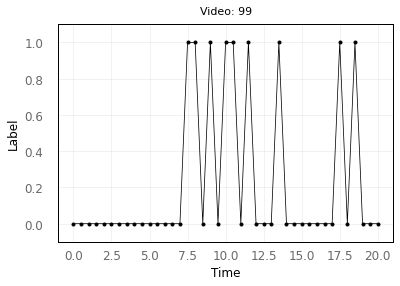

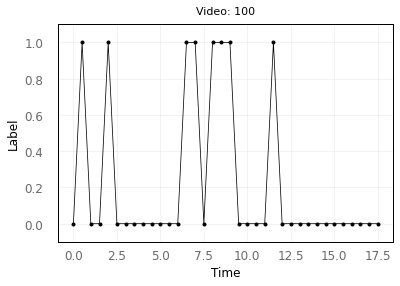

In [55]:
listed=(list(plot_df.groupby("label")))
for i in listed:
    fig = plt.figure()
    plt.plot(i[1].loc[:,'time'],i[1].loc[:,'pred'],marker = '.', color = "Black")
    plt.title("Video: "+str(i[0]))
    plt.xlabel("Time")
    plt.ylabel("Label")
    plt.ylim(-0.1,1.1)
    plt.show()
    json_save=i[1].iloc[:,1:2]
    # json_save.to_json('timeLabel: ' +str(i[0])+ ".json")
  

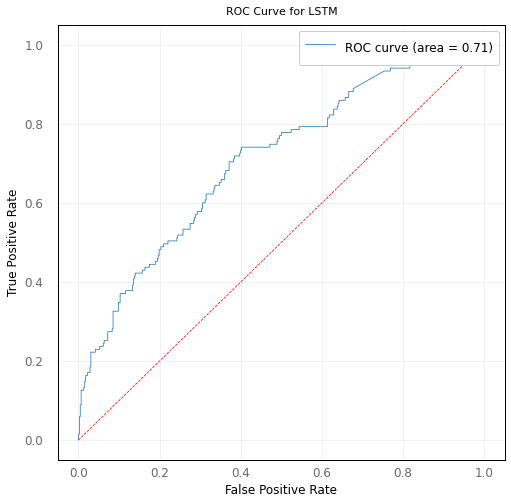

In [56]:
## Check ROC for the data
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

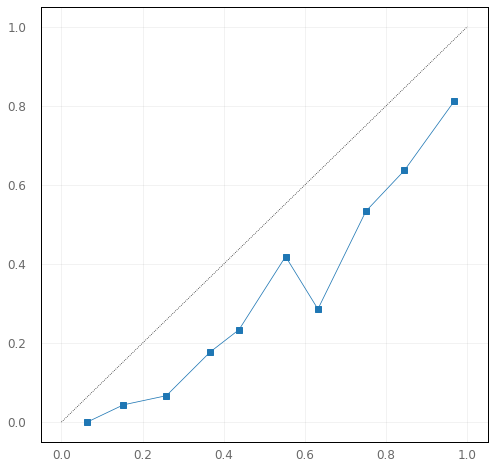

In [57]:
## Calibration curve
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')

In [58]:
# serialize weights to HDF5
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
model=load_model('model.h5')

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               5632      
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 10, 512)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 256)           787456    
_________________________________________________________________
flatten_5 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               327808    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)               

In [0]:
np.save("NN_test.npy",y_score_10)
Y_score_train= model.predict_proba(x_shaped_train)
np.save("NN_train.npy",Y_score_train)